In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np

# Distribution of physical activity level (PAL) in Wave 1

## PAL per child

In [29]:
# Read data
fitbit_new = pd.read_csv('../data/Fitbit_Imputation_FINAL.csv', sep=';', header=0)
main_w2 = pd.read_csv("../data/W2_Main_Questions.csv", sep=';', header=0, encoding='latin-1')

In [21]:
# wave 1
steps_by_wave = fitbit_new.groupby(['Child', 'Wave']).mean()['Steps'].reset_index()
steps_by_wave.Steps = steps_by_wave.Steps * 0.0001
PAL_wave1 = steps_by_wave[steps_by_wave["Wave"] ==1]
PAL_wave1 = PAL_wave1.dropna()
PAL_wave1.describe()

,Child,Wave,Steps
count,926.000000,926.0,926.000000
mean,2206.058315,1.0,0.916652
std,801.865782,0.0,0.343573
min,902.000000,1.0,0.123467
25%,1455.500000,1.0,0.673142
50%,2269.500000,1.0,0.887773
75%,2940.750000,1.0,1.105740
max,4890.000000,1.0,2.246200


In [22]:
# wave 1 by sex
steps_by_sex_wave = fitbit_new.groupby(['Child', 'Sex', 'Wave']).mean()['Steps'].reset_index()
steps_by_sex_wave.Steps = steps_by_sex_wave.Steps * 0.0001
PAL_wave1_by_sex = steps_by_sex_wave[steps_by_sex_wave["Wave"] ==1]
PAL_wave1_by_sex = PAL_wave1_by_sex.dropna()
PAL_wave1_by_sex.describe()

,Child,Sex,Wave,Steps
count,926.000000,926.000000,926.0,926.000000
mean,2206.058315,0.542117,1.0,0.916652
std,801.865782,0.498492,0.0,0.343573
min,902.000000,0.000000,1.0,0.123467
25%,1455.500000,0.000000,1.0,0.673142
50%,2269.500000,1.000000,1.0,0.887773
75%,2940.750000,1.000000,1.0,1.105740
max,4890.000000,1.000000,1.0,2.246200


## FAS

In [41]:
# select FAS questions
df_env = main_w2[['Child','GEN_FAS_GEN_FAS_computer_1' ,'GEN_FAS_GEN_FAS_car_1', 'GEN_FAS_GEN_FAS_vacation_1', 'GEN_FAS_GEN_FAS_ownroom_1']]
# calculate FAS score
df_env['FAS_score'] = df_env['GEN_FAS_GEN_FAS_computer_1'] + df_env['GEN_FAS_GEN_FAS_vacation_1'] + df_env['GEN_FAS_GEN_FAS_car_1']*1.5 + df_env['GEN_FAS_GEN_FAS_ownroom_1']*3

# to keep the values between 0 and 2.
df_env['FAS_scaled'] = abs((df_env.FAS_score/6) - 2)


# select participants
df_env2 = df_env[df_env.Child.isin(PAL_wave1_by_sex.Child)]

print("Number of participants with missing FAS score:", np.isnan(df_env2['FAS_scaled']).sum())

# missing will be replaced by overall average value
mean_FAS_scaled = df_env2['FAS_scaled'].mean()
print("Mean FAS_scaled:",mean_FAS_scaled) # different than original because 518 participants instead of 408
mean_FAS_score = df_env2['FAS_score'].mean()
print("Mean FAS_score:",mean_FAS_score) # different than original because 518 participants instead of 408
for i in df_env2.index:
    if np.isnan(df_env2.at[i,'FAS_scaled']):
        df_env2.at[i,'FAS_scaled'] = mean_FAS_scaled
    if np.isnan(df_env2.at[i,'FAS_score']):
        df_env2.at[i,'FAS_score'] = mean_FAS_score

df_env3 = df_env2[['Child', 'FAS_scaled', 'FAS_score']]

df_env3

Number of participants with missing FAS score: 139
Mean FAS_scaled: 0.5002117746717493
Mean FAS_score: 8.998729351969505


/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/davidblok/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Child,FAS_scaled,FAS_score
0,902,0.500212,8.998729
1,904,0.500212,8.998729
2,907,0.500212,8.998729
3,908,0.500212,8.998729
4,909,0.500212,8.998729
...,...,...,...
947,4886,0.500212,8.998729
948,4887,0.500212,8.998729
949,4888,0.500212,8.998729
950,4889,0.500212,8.998729


In [43]:
# combine PAL1 with FAS

PAL_wave1_by_sex_fas = pd.merge(PAL_wave1_by_sex, df_env3, on="Child")
PAL_wave1_by_sex_fas = PAL_wave1_by_sex_fas [['Child', 'Steps', 'Sex', 'FAS_scaled']]
PAL_wave1_by_sex_fas.describe()

,Child,Steps,Sex,FAS_scaled
count,926.000000,926.000000,926.000000,926.000000
mean,2206.058315,0.916652,0.542117,0.500212
std,801.865782,0.343573,0.498492,0.300500
min,902.000000,0.123467,0.000000,0.000000
25%,1455.500000,0.673142,0.000000,0.333333
50%,2269.500000,0.887773,1.000000,0.500212
75%,2940.750000,1.105740,1.000000,0.666667
max,4890.000000,2.246200,1.000000,1.833333


## Frequency distribution

In [83]:
PAL_male_low = PAL_wave1_by_sex_fas[(PAL_wave1_by_sex_fas['Sex']==0) & (PAL_wave1_by_sex_fas['FAS_scaled'] >=1)]
PAL_female_low = PAL_wave1_by_sex_fas[(PAL_wave1_by_sex_fas['Sex']==1) & (PAL_wave1_by_sex_fas['FAS_scaled'] >=1)]
PAL_male_high = PAL_wave1_by_sex_fas[(PAL_wave1_by_sex_fas['Sex']==0) & (PAL_wave1_by_sex_fas['FAS_scaled'] <1)]
PAL_female_high = PAL_wave1_by_sex_fas[(PAL_wave1_by_sex_fas['Sex']==1) & (PAL_wave1_by_sex_fas['FAS_scaled'] <1)]

# since no difference between high and low SES only split into sex
PAL_male = PAL_wave1_by_sex_fas[(PAL_wave1_by_sex_fas['Sex']==0) ]
PAL_female = PAL_wave1_by_sex_fas[(PAL_wave1_by_sex_fas['Sex']==1) ]


(array([ 4.,  2.,  2.,  5.,  9., 15., 14., 15., 17., 25., 34., 40., 54.,
        53., 38., 47., 38., 51., 64., 38., 40., 40., 44., 21., 26., 28.,
        27., 19., 20., 14., 20.,  5., 10.,  5.,  6.,  8.,  4.,  3.,  5.,
         1.,  2.,  2.,  2.,  1.,  3.,  0.,  2.,  1.,  0.,  2.]),
 array([0.12346667, 0.16592133, 0.208376  , 0.25083067, 0.29328533,
        0.33574   , 0.37819467, 0.42064933, 0.463104  , 0.50555867,
        0.54801333, 0.590468  , 0.63292267, 0.67537733, 0.717832  ,
        0.76028667, 0.80274133, 0.845196  , 0.88765067, 0.93010533,
        0.97256   , 1.01501467, 1.05746933, 1.099924  , 1.14237867,
        1.18483333, 1.227288  , 1.26974267, 1.31219733, 1.354652  ,
        1.39710667, 1.43956133, 1.482016  , 1.52447067, 1.56692533,
        1.60938   , 1.65183467, 1.69428933, 1.736744  , 1.77919867,
        1.82165333, 1.864108  , 1.90656267, 1.94901733, 1.991472  ,
        2.03392667, 2.07638133, 2.118836  , 2.16129067, 2.20374533,
        2.2462    ]),
 <BarContainer

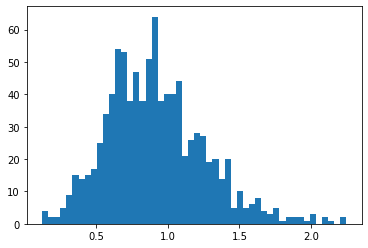

In [70]:
plt.hist(PAL_wave1.Steps, bins=50)

(array([ 3.,  2.,  1.,  1.,  5.,  6., 11., 10., 15., 11., 21., 20., 26.,
        30., 26., 20., 31., 23., 29., 35., 18., 11., 17., 18., 14., 11.,
         9., 13.,  7., 13.,  6.,  4., 10.,  1.,  8.,  1.,  1.,  1.,  1.,
         2.,  3.,  1.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  2.]),
 array([0.12346667, 0.16346933, 0.203472  , 0.24347467, 0.28347733,
        0.32348   , 0.36348267, 0.40348533, 0.443488  , 0.48349067,
        0.52349333, 0.563496  , 0.60349867, 0.64350133, 0.683504  ,
        0.72350667, 0.76350933, 0.803512  , 0.84351467, 0.88351733,
        0.92352   , 0.96352267, 1.00352533, 1.043528  , 1.08353067,
        1.12353333, 1.163536  , 1.20353867, 1.24354133, 1.283544  ,
        1.32354667, 1.36354933, 1.403552  , 1.44355467, 1.48355733,
        1.52356   , 1.56356267, 1.60356533, 1.643568  , 1.68357067,
        1.72357333, 1.763576  , 1.80357867, 1.84358133, 1.883584  ,
        1.92358667, 1.96358933, 2.003592  , 2.04359467, 2.08359733,
        2.1236    ]),
 <BarContainer

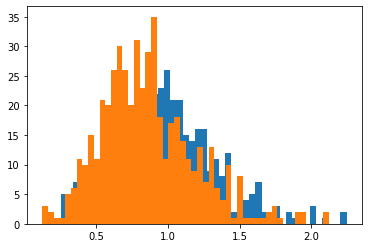

In [93]:
plt.hist(PAL_male.Steps, bins=50)
plt.hist(PAL_female.Steps, bins=50)

(array([ 1.,  0.,  1.,  5.,  2.,  7.,  3.,  2.,  4.,  7., 13., 15., 20.,
        25., 17., 14., 15., 24., 22., 23., 26., 21., 21., 15., 14., 16.,
        16.,  9., 11.,  8., 12.,  2.,  2.,  4.,  5.,  7.,  2.,  1.,  3.,
         0.,  2.,  1.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  2.]),
 array([0.12823333, 0.17059267, 0.212952  , 0.25531133, 0.29767067,
        0.34003   , 0.38238933, 0.42474867, 0.467108  , 0.50946733,
        0.55182667, 0.594186  , 0.63654533, 0.67890467, 0.721264  ,
        0.76362333, 0.80598267, 0.848342  , 0.89070133, 0.93306067,
        0.97542   , 1.01777933, 1.06013867, 1.102498  , 1.14485733,
        1.18721667, 1.229576  , 1.27193533, 1.31429467, 1.356654  ,
        1.39901333, 1.44137267, 1.483732  , 1.52609133, 1.56845067,
        1.61081   , 1.65316933, 1.69552867, 1.737888  , 1.78024733,
        1.82260667, 1.864966  , 1.90732533, 1.94968467, 1.992044  ,
        2.03440333, 2.07676267, 2.119122  , 2.16148133, 2.20384067,
        2.2462    ]),
 <BarContainer

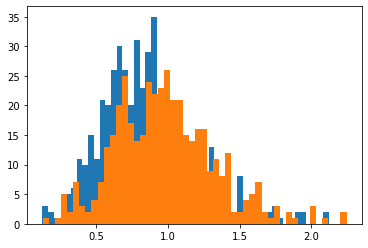

In [94]:
plt.hist(PAL_female.Steps, bins=50)
plt.hist(PAL_male.Steps, bins=50)

## Cumulative distribution

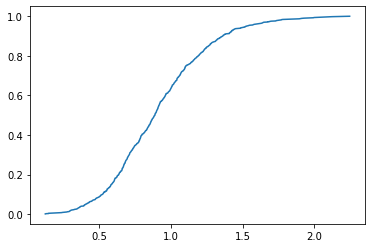

In [86]:
ecdf = ECDF(PAL_wave1.Steps)
ecdf_male_low = ECDF(PAL_male_low.Steps)
ecdf_female_low = ECDF(PAL_female_low.Steps)
ecdf_male_high = ECDF(PAL_male_high.Steps)
ecdf_female_high = ECDF(PAL_female_high.Steps)
ecdf_male   = ECDF(PAL_male.Steps)
ecdf_female = ECDF(PAL_female.Steps)


plt.plot(ecdf.x, ecdf.y)

## Save plots

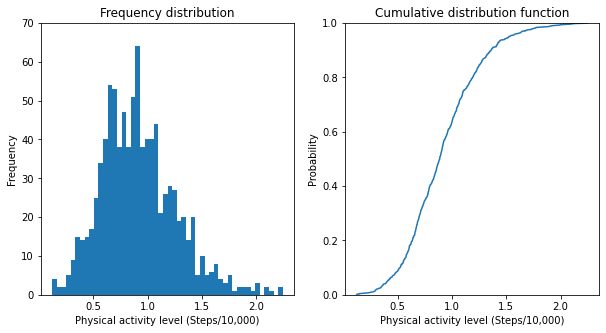

In [9]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.set_title('Frequency distribution')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('Physical activity level (Steps/10,000)')
ax1.set_ylim([0, 70])
ax1.hist(PAL_wave1, bins=50)

ax2.set_title('Cumulative distribution function')
ax2.set_ylabel('Probability')
ax2.set_xlabel('Physical activity level (Steps/10,000)')
ax2.set_ylim([0, 1])
ax2.plot(ecdf.x, ecdf.y)


fig.savefig('../output/plots/pal_w1_dist.eps', bbox_inches='tight', format='eps', dpi=1000)


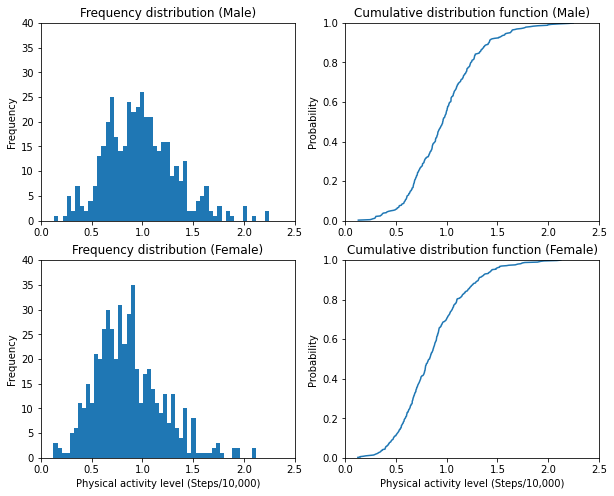

In [92]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10,8))

ax1.set_title('Frequency distribution (Male)')
ax1.set_ylabel('Frequency')
#ax1.set_xlabel('Physical activity level (Steps/10,000)')
ax1.set_ylim([0, 40])
ax1.set_xlim([0, 2.5])
ax1.hist(PAL_male.Steps, bins=50)

ax2.set_title('Cumulative distribution function (Male)')
ax2.set_ylabel('Probability')
#ax2.set_xlabel('Physical activity level (Steps/10,000)')
ax2.set_ylim([0, 1])
ax2.set_xlim([0, 2.5])
ax2.plot(ecdf_male.x, ecdf_male.y)

ax3.set_title('Frequency distribution (Female)')
ax3.set_ylabel('Frequency')
ax3.set_xlabel('Physical activity level (Steps/10,000)')
ax3.set_ylim([0, 40])
ax3.set_xlim([0, 2.5])
ax3.hist(PAL_female.Steps, bins=50)

ax4.set_title('Cumulative distribution function (Female)')
ax4.set_ylabel('Probability')
ax4.set_xlabel('Physical activity level (Steps/10,000)')
ax4.set_ylim([0, 1])
ax4.set_xlim([0, 2.5])
ax4.plot(ecdf_female.x, ecdf_female.y)



fig.savefig('../output/plots/pal_w1_sex_dist.eps', bbox_inches='tight', format='eps', dpi=1000)

In [6]:
import numpy as np
np.random.seed(1)
for i in range(1,100):
    r = np.random.random_sample(1)
    pal = np.quantile(PAL_male, q=r)
    print(pal)

NameError: name 'PAL_male' is not defined